<a href="https://colab.research.google.com/github/Fire-monsters/AI_cybersecurity_phishing_detector/blob/main/Phishing_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Enhancing cybersecurity with artificial intelligence project..

# Google Colab Setup & Data Pipeline


In [2]:
# Install core libraries
!pip install scikit-learn==1.4.2 pandas==2.2.2 numpy==2.0.0 requests==2.32.3 beautifulsoup4==4.12.3 tldextract==5.1.1 joblib==1.3.2

  Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.8 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.


In [3]:
!pip install scikit-learn==1.6

  Using cached scikit_learn-1.6.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2


In [4]:
# provide utilities for inspecting and managing PCI (Peripheral Component Interconnect) devices
!sudo apt-get install pciutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 pci.ids all 0.0~2022.01.22-1ubuntu0.1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 1s (263 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: un

In [5]:
# Add cybersecurity-specific tools
!pip install httpx==0.28.1
!pip install ollama==0.4.3  # For LLM-assisted analysis :cite[2]
!curl -fsSL https://ollama.ai/install.sh | sh  # Initialize Ollama

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 6.9.0 requires httpx[http2]==0.28.1, but you have httpx 0.27.2 which is incompatible.
google-genai 1.23.0 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.2 which is incompatible.
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install

In [6]:
# Verify GPU access
import torch
print(f"GPU available: {torch.cuda.is_available()}")
print(f"GPU type: {torch.cuda.get_device_name(0)}")

GPU available: True
GPU type: Tesla T4


In [7]:
from google.colab import drive
drive.mount('/content/drive')

# Create project folder
!mkdir -p "/content/drive/MyDrive/Phishing_Detector/datasets"

# Assuming df is your DataFrame
#pd = df.to_csv('/content/drive/MyDrive/Phishing_Detector/datasets/verified_online.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Downloading the datasets
import requests
import pandas as pd

In [9]:
# 1. Phishing URLs (PhishTank)
phish_df = pd.read_csv('verified_online.csv')
phish_df = phish_df[['url']].copy()
phish_df['label'] = 1  # Mark as phishing

print(f"Phishing URLs: {len(phish_df)}")

Phishing URLs: 52591


In [11]:
# Assuming you have uploaded top-1m.csv.zip using the Colab UI
# You don't need the !wget command if you've manually uploaded it.

!unzip top-1m.csv.zip

legit_df = pd.read_csv('top-1m.csv', header=None, names=['rank','url'])
legit_df = legit_df.head(25000)[['url']]  # Use first 25K
legit_df['label'] = 0

print("\n DataFrame head after loading:")
print(legit_df.head())
print(f"\n DataFrame shape: {legit_df.shape}")
print(f"\n Legitimate URLs: {len(legit_df)}")

Archive:  top-1m.csv.zip
  inflating: top-1m.csv              

 DataFrame head after loading:
             url  label
0     google.com      0
1    youtube.com      0
2   facebook.com      0
3      baidu.com      0
4  wikipedia.org      0

 DataFrame shape: (25000, 2)

 Legitimate URLs: 25000


In [12]:
# 3. Combine datasets
df = pd.concat([phish_df, legit_df], ignore_index=True)
df.to_csv("/content/drive/MyDrive/Phishing_Detector/datasets/raw_urls.csv", index=False)

In [13]:
import tldextract
from urllib.parse import urlparse
import re
import numpy as np

def extract_features(url):
    try:
        parsed = urlparse(url)
        ext = tldextract.extract(url)

        # URL structure features
        features = {
            'url_len': len(url),
            'num_dots': url.count('.'),
            'num_hyphen': url.count('-'),
            'num_at': url.count('@'),
            'num_dslash': url.count('//'),
            'has_https': int(parsed.scheme == 'https'),
            'domain_len': len(ext.domain),
            'subdomain_cnt': ext.subdomain.count('.') + 1 if ext.subdomain else 0,
            'is_ip': int(bool(re.match(r'\d+\.\d+\.\d+\.\d+', ext.domain))),
            'digit_ratio': sum(c.isdigit() for c in url) / max(1, len(url))
        }

        # Suspicious keywords
        keywords = ['login', 'verify', 'bank', 'paypal', 'secure', 'account', 'update']
        for kw in keywords:
            features[f'has_{kw}'] = int(kw in url.lower())

        return features

    except:
        # Return null features on error
        return {k: np.nan for k in ['url_len', 'num_dots', 'num_hyphen',
                                   'num_at', 'num_dslash', 'has_https',
                                   'domain_len', 'subdomain_cnt', 'is_ip',
                                   'digit_ratio'] + [f'has_{kw}' for kw in keywords]}

In [14]:
from joblib import Parallel, delayed
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Phishing_Detector/datasets/raw_urls.csv")

# Parallel feature extraction
features = Parallel(n_jobs=-1, verbose=10)(
    delayed(extract_features)(url) for url in df['url']
)

# Merge features
features_df = pd.DataFrame(features)
processed_df = pd.concat([df, features_df], axis=1)

# Handle errors
processed_df = processed_df.dropna(subset=['url_len'])
processed_df = processed_df.fillna(0)  # Fill missing keyword flags with 0

# Save processed data
processed_df.to_csv("/content/drive/MyDrive/Phishing_Detector/datasets/processed_urls.csv", index=False)
print(f"Processed {len(processed_df)} URLs | {processed_df['label'].mean():.1%} phishing")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.19736035074646008s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0055675506591796875s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.008383035659790039s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.01167917251586914s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.006728649139404297s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0077326297760

Processed 77591 URLs | 67.8% phishing


In [15]:
from joblib import Parallel, delayed
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Phishing_Detector/datasets/raw_urls.csv")

# Parallel feature extraction
features = Parallel(n_jobs=-1, verbose=10)(
    delayed(extract_features)(url) for url in df['url']
)

# Merge features
features_df = pd.DataFrame(features)
processed_df = pd.concat([df, features_df], axis=1)

# Handle errors
processed_df = processed_df.dropna(subset=['url_len'])
processed_df = processed_df.fillna(0)  # Fill missing keyword flags with 0

# Save processed data
processed_df.to_csv("/content/drive/MyDrive/Phishing_Detector/datasets/processed_urls.csv", index=False)
print(f"Processed {len(processed_df)} URLs | {processed_df['label'].mean():.1%} phishing")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.006860017776489258s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0021491050720214844s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0077440738677978516s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0064923763275146484s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.007262706756591797s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.007888078689575195s.) Setting batch_size=64.
[Parallel(n_jobs=-1)]: Bat

Processed 77591 URLs | 67.8% phishing


In [16]:
# Quick validation
sample = processed_df.sample(5)
print(sample[['url', 'label', 'url_len', 'has_login', 'is_ip']])

# Basic stats
print("\nFeature Summary:")
print(f"Avg phishing URL length: {processed_df[processed_df.label==1]['url_len'].mean():.0f}")
print(f"Avg legit URL length: {processed_df[processed_df.label==0]['url_len'].mean():.0f}")
print(f"% with IP addresses: {processed_df['is_ip'].mean():.1%}")

                                                     url  label  url_len  \
21253                             https://bit.ly/4gGQs56      1       22   
30541                              https://q-r.to/bfETbh      1       21   
48792  https://ipfs.best-practice.se/ipfs/bafybeihxpt...      1       94   
17617  https://docs.google.com/presentation/d/e/2PACX...      1      173   
59065                                             rpp.pe      0        6   

       has_login  is_ip  
21253          0      0  
30541          0      0  
48792          0      0  
17617          0      0  
59065          0      0  

Feature Summary:
Avg phishing URL length: 61
Avg legit URL length: 12
% with IP addresses: 0.5%


In [17]:
df = pd.read_csv("/content/drive/MyDrive/Phishing_Detector/datasets/processed_urls.csv")
df.head()

,url,label,url_len,num_dots,num_hyphen,num_at,num_dslash,has_https,domain_len,subdomain_cnt,is_ip,digit_ratio,has_login,has_verify,has_bank,has_paypal,has_secure,has_account,has_update
0,https://sbiservice.onlinehealth4you.com,1,39,2,0,0,1,1,16,1,0,0.025641,0,0,0,0,0,0,0
1,https://xeoduswalletc.godaddysites.com,1,38,2,0,0,1,1,12,1,0,0.000000,0,0,0,0,0,0,0
2,http://welcome-bridge-us-eng.teachable.com,1,42,2,3,0,1,0,9,1,0,0.000000,0,0,0,0,0,0,0
3,http://allegrolokalnie.pl-841813.cfd,1,36,2,1,0,1,0,9,1,0,0.166667,0,0,0,0,0,0,0
4,http://web-eng-bredge-docs.teachable.com,1,40,2,3,0,1,0,9,1,0,0.000000,0,0,0,0,0,0,0


# AI Model Development


In [18]:
# Load & Prepare Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load processed dataset
df = pd.read_csv('/content/drive/MyDrive/Phishing_Detector/datasets/processed_urls.csv')

# Selected features (add keyword flags if available)
FEATURES = ['url_len', 'num_dots', 'has_https', 'is_ip', 'num_hyphen', 'digit_ratio'] + \
           [col for col in df.columns if col.startswith('has_')]

# Handle missing values
df = df.fillna(0)

# Split data
X = df[FEATURES]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")
print(f"Features used: {', '.join(FEATURES)}")

Train size: 62072 | Test size: 15519
Features used: url_len, num_dots, has_https, is_ip, num_hyphen, digit_ratio, has_https, has_login, has_verify, has_bank, has_paypal, has_secure, has_account, has_update


In [19]:
#Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize model with optimized parameters
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    class_weight='balanced',  # Handle dataset imbalance
    random_state=42,
    n_jobs=-1  # Use all cores
)

# Train
model.fit(X_train, y_train)

# Quick validation
train_preds = model.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print(f"Training Accuracy: {train_acc:.2%}")

Training Accuracy: 99.54%



Test Accuracy: 99.50%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5008
           1       1.00      0.99      1.00     10511

    accuracy                           1.00     15519
   macro avg       0.99      1.00      0.99     15519
weighted avg       1.00      1.00      1.00     15519



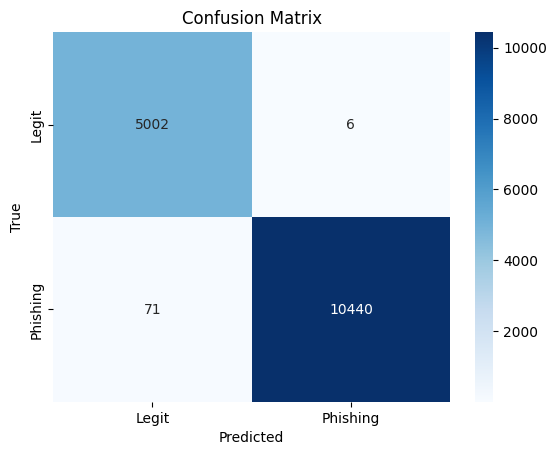

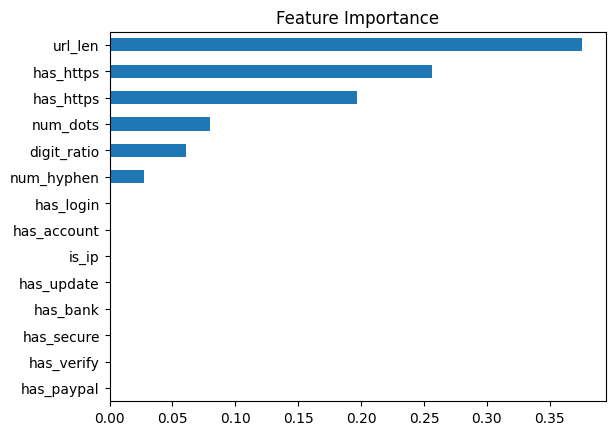

In [20]:
#Evaluate Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Test predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Phishing probability

# Metrics
test_acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {test_acc:.2%}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legit', 'Phishing'],
            yticklabels=['Legit', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance
importance = pd.Series(model.feature_importances_, index=FEATURES)
importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [ ]:
#Optimize Performance
# Option 1: Add more features
if test_acc < 0.9:
    print("Adding more features...")
    NEW_FEATURES = FEATURES + ['subdomain_cnt', 'domain_len', 'num_dslash']
    X_train = X_train[NEW_FEATURES]
    X_test = X_test[NEW_FEATURES]
    model.fit(X_train, y_train)
    # Re-evaluate

# Option 2: Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='precision')
grid.fit(X_train, y_train)
model = grid.best_estimator_

In [21]:
#Exporting Model
import joblib
from datetime import datetime

# Save model
MODEL_PATH = f"/content/drive/MyDrive/Phishing_Detector/models/model_{datetime.now().strftime('%Y%m%d')}.joblib"
joblib.dump(model, MODEL_PATH)

# Save test sample for verification
test_sample = X_test.sample(5)
test_sample.to_csv(MODEL_PATH.replace('.joblib', '_sample.csv'))
print(f"Model saved to: {MODEL_PATH}")

Model saved to: /content/drive/MyDrive/Phishing_Detector/models/model_20250707.joblib
